Python club

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
data = "derived_data_C29.xlsx"
data = pd.read_excel(data)

In [104]:
data

,,"Frontal pole, cerebral cortex",Primary motor area,Secondary motor area,"Primary somatosensory area, nose","Primary somatosensory area, barrel field","Primary somatosensory area, lower limb","Primary somatosensory area, mouth","Primary somatosensory area, upper limb","Primary somatosensory area, trunk",...,"Pons, motor related","Pons, behavioral state related","Medulla, unassigned","Medulla, sensory related","Medulla, motor related","Medulla, behavioral state related",Cerebellar cortex,Cerebellar nuclei,Fiber tracts,Ventricular systems
0,total number,NaN,45212.000000,NaN,7376.000000,17772.000000,9132.000000,21356.000000,15064.000000,4656.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,density,1327.190476,2723.571429,2959.857143,1501.857143,1306.214286,1870.976190,1639.547619,16503.785714,1127.119048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,592.738095,583.190476
2,cell diameter,7.482185,7.175693,6.942180,7.082837,7.084184,6.830441,7.151542,7.086245,6.645882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.640203,3.585840


Read the custom region file

The delimiters in the file are actually semicolons and not commas so it is necessary to use the sep=; 

In [105]:
customregions = "customregions.csv"
customregions = pd.read_csv(customregions, sep=";")

In [106]:
list(data.columns)

[' ',
 'Frontal pole, cerebral cortex',
 'Primary motor area',
 'Secondary motor area',
 'Primary somatosensory area, nose',
 'Primary somatosensory area, barrel field',
 'Primary somatosensory area, lower limb',
 'Primary somatosensory area, mouth',
 'Primary somatosensory area, upper limb',
 'Primary somatosensory area, trunk',
 'Primary somatosensory area, unassigned',
 'Supplemental somatosensory area',
 'Gustatory areas',
 'Visceral area',
 'Dorsal auditory area',
 'Primary auditory area',
 'Posterior auditory area',
 'Ventral auditory area',
 'Anterolateral visual area',
 'Anteromedial visual area',
 'Lateral visual area',
 'Primary visual area',
 'Posterolateral visual area',
 'Posteromedial visual area',
 'Laterointermediate area',
 'Postrhinal area',
 'Anterior cingulate area, dorsal part',
 'Anterior cingulate area, ventral part',
 'Prelimbic area',
 'Infralimbic area',
 'Orbital area',
 'Orbital area, lateral part',
 'Orbital area, medial part',
 'Orbital area, ventrolateral

In [107]:
customregions

,Unnamed: 0,Region name,R,G,B,Hierarchy
0,0,"Frontal pole, cerebral cortex",38,143,69,Cortex
1,1,Primary motor area,31,157,90,Cortex
2,2,Secondary motor area,31,157,90,Cortex
3,3,"Primary somatosensory area, nose",24,128,100,Cortex
4,4,"Primary somatosensory area, barrel field",24,128,100,Cortex
...,...,...,...,...,...,...
201,201,"Medulla, behavioral state related",255,198,226,Medulla
202,202,Cerebellar cortex,240,240,128,Cerebellum
203,203,Cerebellar nuclei,240,240,128,Cerebellum
204,204,Fiber tracts,204,204,204,Fiber tracts


In [108]:
regionnames = customregions["Region name"]

In [109]:
regionnames # this is a series

0                 Frontal pole, cerebral cortex
1                            Primary motor area
2                          Secondary motor area
3              Primary somatosensory area, nose
4      Primary somatosensory area, barrel field
                         ...                   
201           Medulla, behavioral state related
202                           Cerebellar cortex
203                           Cerebellar nuclei
204                                Fiber tracts
205                         Ventricular systems
Name: Region name, Length: 206, dtype: object

Define the parts of the data we're interest in

In [110]:
regionnames_list = list(regionnames)

In [111]:
totalnumber = data.iloc[0] # index into the 

In [112]:
data.iloc[0,2] # index into the dataframe, iloc means index location. 

45212.0

In [113]:
data.loc[1,"Secondary motor area"] # loc is row and column names

2959.857142857143

In [114]:
data.iloc[0,:]

                                     total number
Frontal pole, cerebral cortex                 NaN
Primary motor area                        45212.0
Secondary motor area                          NaN
Primary somatosensory area, nose           7376.0
                                         ...     
Medulla, behavioral state related             0.0
Cerebellar cortex                             0.0
Cerebellar nuclei                             0.0
Fiber tracts                                  NaN
Ventricular systems                           NaN
Name: 0, Length: 207, dtype: object

In [115]:
totalnumber # this is a series

                                     total number
Frontal pole, cerebral cortex                 NaN
Primary motor area                        45212.0
Secondary motor area                          NaN
Primary somatosensory area, nose           7376.0
                                         ...     
Medulla, behavioral state related             0.0
Cerebellar cortex                             0.0
Cerebellar nuclei                             0.0
Fiber tracts                                  NaN
Ventricular systems                           NaN
Name: 0, Length: 207, dtype: object

remove header

In [116]:
totalnumber = totalnumber[1:]

In [117]:
totalnumber

Frontal pole, cerebral cortex                   NaN
Primary motor area                          45212.0
Secondary motor area                            NaN
Primary somatosensory area, nose             7376.0
Primary somatosensory area, barrel field    17772.0
                                             ...   
Medulla, behavioral state related               0.0
Cerebellar cortex                               0.0
Cerebellar nuclei                               0.0
Fiber tracts                                    NaN
Ventricular systems                             NaN
Name: 0, Length: 206, dtype: object

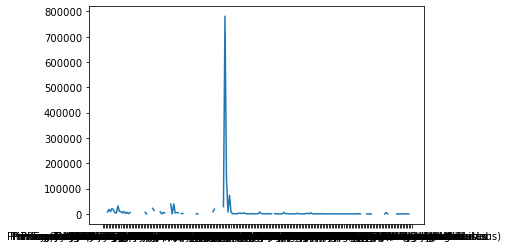

In [118]:
plot_total = plt.plot(totalnumber)

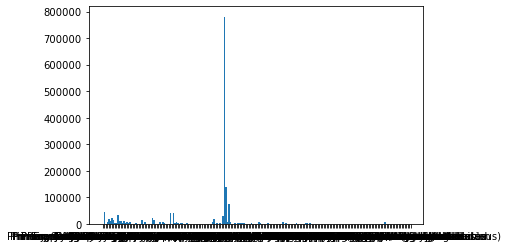

In [119]:
barplot_total = plt.bar(regionnames,totalnumber)

In [120]:
density = data.iloc[1]

In [121]:
density = density[1:]

In [122]:
density

Frontal pole, cerebral cortex               1327.190476
Primary motor area                          2723.571429
Secondary motor area                        2959.857143
Primary somatosensory area, nose            1501.857143
Primary somatosensory area, barrel field    1306.214286
                                               ...     
Medulla, behavioral state related                   0.0
Cerebellar cortex                                   0.0
Cerebellar nuclei                                   0.0
Fiber tracts                                 592.738095
Ventricular systems                          583.190476
Name: 1, Length: 206, dtype: object

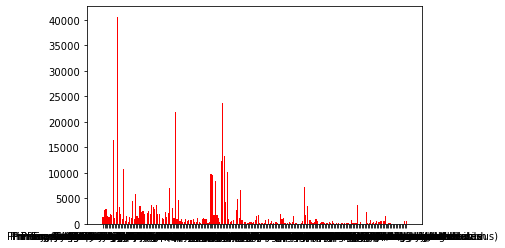

In [125]:
barplot_density = plt.bar(regionnames, density, color = (1,0,0))

In [126]:
regioncolors = customregions[["R", "G", "B"]] # index them

In [127]:
regioncolors

,R,G,B
0,38,143,69
1,31,157,90
2,31,157,90
3,24,128,100
4,24,128,100
...,...,...,...
201,255,198,226
202,240,240,128
203,240,240,128
204,204,204,204


In [128]:
a = (1,2,3) #tuple, a tuple cannot be modified. 
b = [1,2,3] #list, a list can be modified. 

In [129]:
regioncolors_new = regioncolors/255

In [130]:
regioncolors_new # this is not a list. 

,R,G,B
0,0.149020,0.560784,0.270588
1,0.121569,0.615686,0.352941
2,0.121569,0.615686,0.352941
3,0.094118,0.501961,0.392157
4,0.094118,0.501961,0.392157
...,...,...,...
201,1.000000,0.776471,0.886275
202,0.941176,0.941176,0.501961
203,0.941176,0.941176,0.501961
204,0.800000,0.800000,0.800000


In [135]:
rgb_colors = [] 

for index, column in regioncolors_new.iterrows(): # for element 1, element 2 in regioncolors_new # as it's not a list.  
    rgb = (column["R"], column["G"], column["B"])
    rgb_colors.append(rgb)
    
    # loop through every row. For each row pick value from each column.


In [140]:
rgb_colors

[(0.14901960784313725, 0.5607843137254902, 0.27058823529411763),
 (0.12156862745098039, 0.615686274509804, 0.35294117647058826),
 (0.12156862745098039, 0.615686274509804, 0.35294117647058826),
 (0.09411764705882353, 0.5019607843137255, 0.39215686274509803),
 (0.09411764705882353, 0.5019607843137255, 0.39215686274509803),
 (0.09411764705882353, 0.5019607843137255, 0.39215686274509803),
 (0.09411764705882353, 0.5019607843137255, 0.39215686274509803),
 (0.09411764705882353, 0.5019607843137255, 0.39215686274509803),
 (0.09411764705882353, 0.5019607843137255, 0.39215686274509803),
 (0.09411764705882353, 0.5019607843137255, 0.39215686274509803),
 (0.09411764705882353, 0.5019607843137255, 0.39215686274509803),
 (0.0, 0.611764705882353, 0.4588235294117647),
 (0.06666666666666667, 0.6784313725490196, 0.5137254901960784),
 (0.00392156862745098, 0.5764705882352941, 0.6),
 (0.00392156862745098, 0.5764705882352941, 0.6),
 (0.00392156862745098, 0.5764705882352941, 0.6),
 (0.00392156862745098, 0.5764

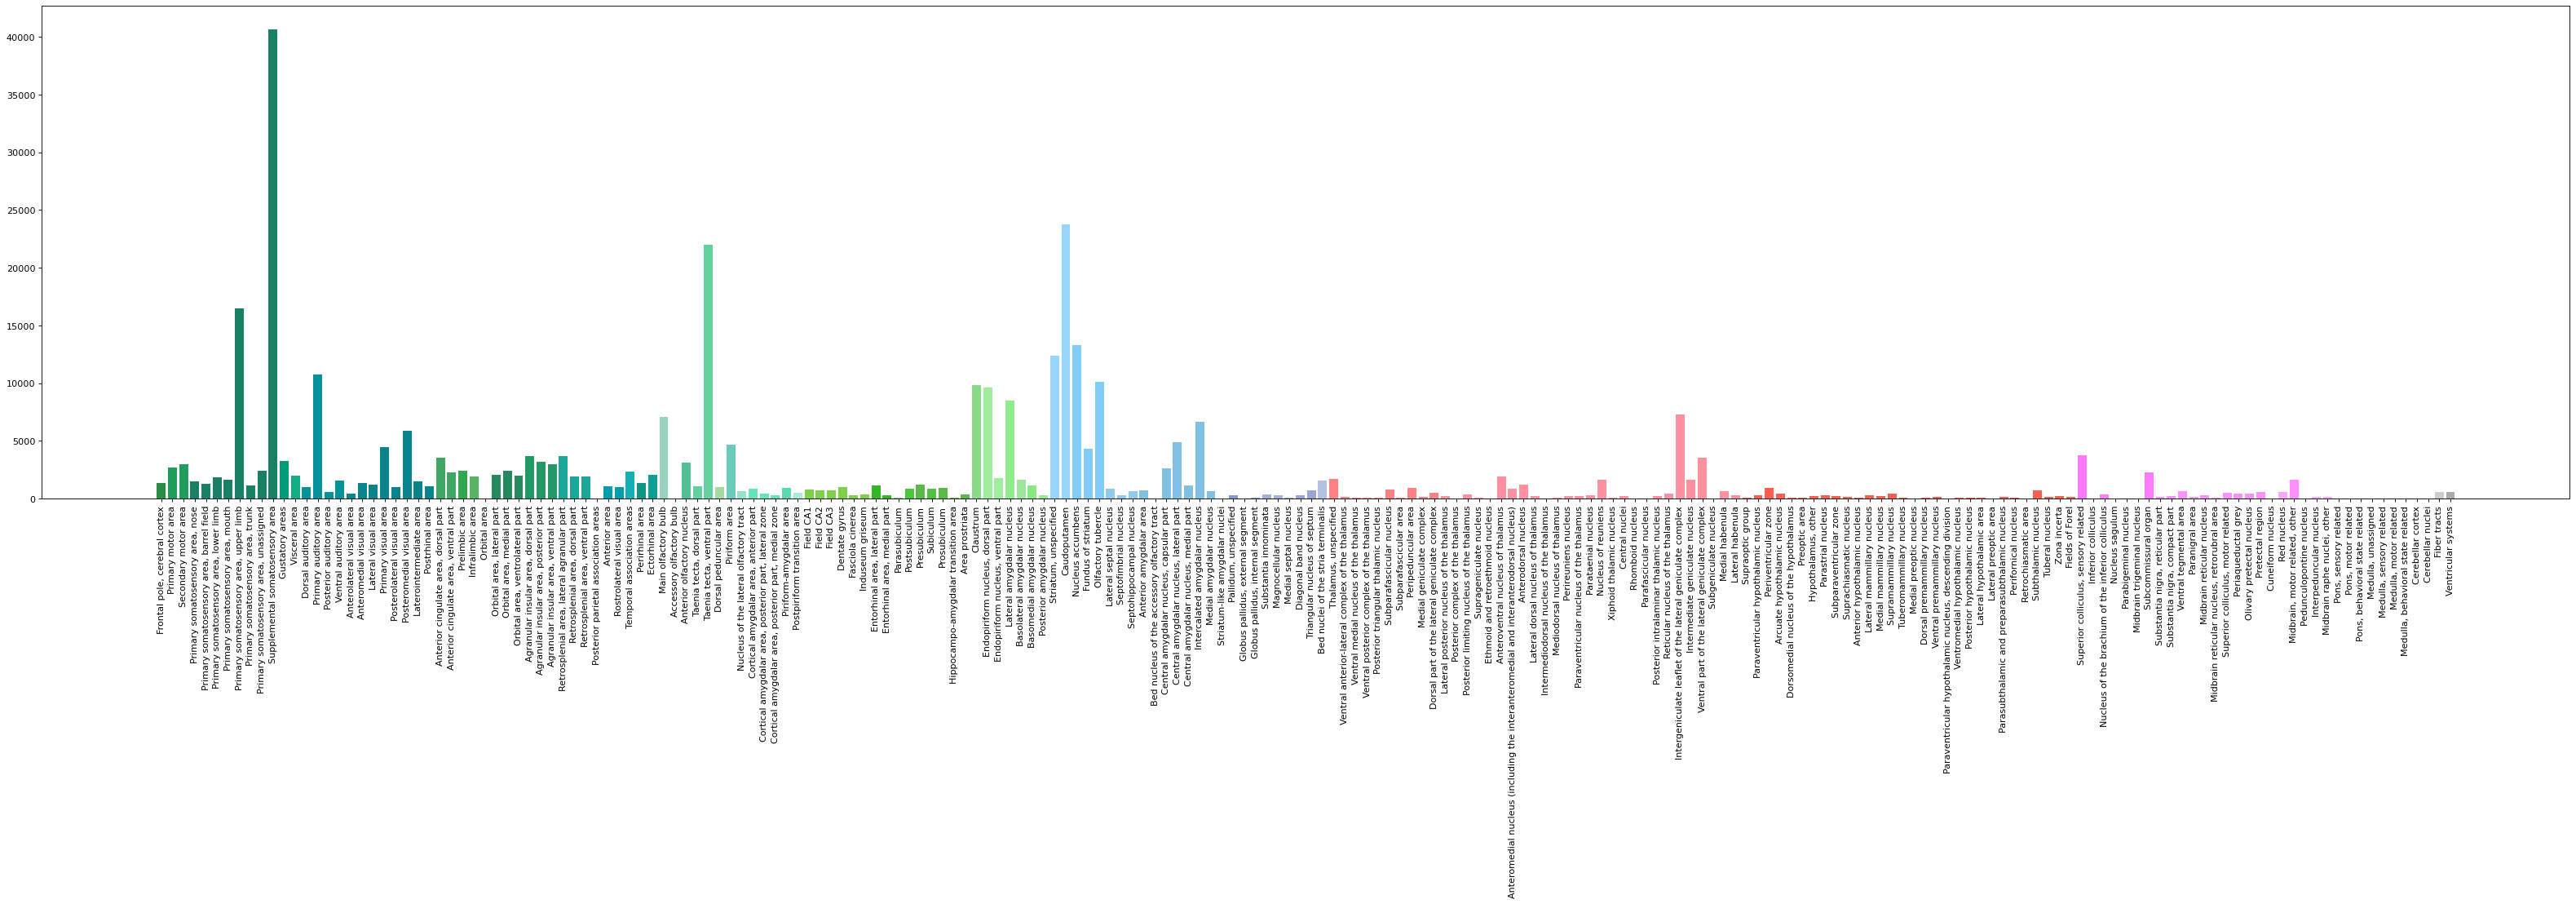

<Figure size 800x4000 with 0 Axes>

In [154]:
from matplotlib.pyplot import figure
figure(figsize = (50,10), dpi = 80)
barplot_density = plt.bar(regionnames, density, color = rgb_colors)
plt.xticks(regionnames[::1], rotation = "vertical")

from matplotlib.pyplot import figure
figure(figsize = (10,50), dpi = 80)
plt.show
plt.savefig("myfigureSY.svg", bbox_inches = "tight")

In [139]:
import numpy as np # alternative method
rgb_color_array = np.array(regioncolors_new)
print(rgb_color_array)

[[0.14901961 0.56078431 0.27058824]
 [0.12156863 0.61568627 0.35294118]
 [0.12156863 0.61568627 0.35294118]
 [0.09411765 0.50196078 0.39215686]
 [0.09411765 0.50196078 0.39215686]
 [0.09411765 0.50196078 0.39215686]
 [0.09411765 0.50196078 0.39215686]
 [0.09411765 0.50196078 0.39215686]
 [0.09411765 0.50196078 0.39215686]
 [0.09411765 0.50196078 0.39215686]
 [0.09411765 0.50196078 0.39215686]
 [0.         0.61176471 0.45882353]
 [0.06666667 0.67843137 0.51372549]
 [0.00392157 0.57647059 0.6       ]
 [0.00392157 0.57647059 0.6       ]
 [0.00392157 0.57647059 0.6       ]
 [0.00392157 0.57647059 0.6       ]
 [0.03137255 0.52156863 0.54901961]
 [0.03137255 0.52156863 0.54901961]
 [0.03137255 0.52156863 0.54901961]
 [0.03137255 0.52156863 0.54901961]
 [0.03137255 0.52156863 0.54901961]
 [0.03137255 0.52156863 0.54901961]
 [0.03137255 0.52156863 0.54901961]
 [0.03137255 0.52156863 0.54901961]
 [0.25098039 0.65098039 0.4       ]
 [0.25098039 0.65098039 0.4       ]
 [0.18431373 0.65882353 0.31

In [142]:
plt.savefig("myfig.svg")

<Figure size 432x288 with 0 Axes>

In [ ]:
# Customizing the x axis
# truncating the y axis 
